In [36]:
import pandas as pd
import numpy as np
import time 
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
path = 'data\household_power_consumption_1000.txt'
names = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [47]:
df = pd.read_csv(path, sep=';')

In [48]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [49]:
#查看所有的变量值
for i in df.columns:
    print(df[i].value_counts())

17/12/2006    604
16/12/2006    396
Name: Date, dtype: int64
08:31:00    1
04:58:00    1
17:44:00    1
02:40:00    1
01:53:00    1
08:02:00    1
21:49:00    1
04:49:00    1
00:14:00    1
01:28:00    1
09:15:00    1
02:54:00    1
06:55:00    1
21:48:00    1
18:00:00    1
18:07:00    1
07:44:00    1
05:53:00    1
02:41:00    1
00:53:00    1
01:07:00    1
07:08:00    1
22:39:00    1
08:41:00    1
01:19:00    1
01:52:00    1
17:47:00    1
17:25:00    1
00:55:00    1
06:06:00    1
           ..
23:11:00    1
22:06:00    1
06:37:00    1
09:11:00    1
03:47:00    1
23:25:00    1
05:51:00    1
04:45:00    1
08:08:00    1
21:30:00    1
09:38:00    1
22:48:00    1
08:16:00    1
23:53:00    1
22:00:00    1
21:44:00    1
23:00:00    1
03:09:00    1
18:28:00    1
07:54:00    1
17:31:00    1
00:47:00    1
19:31:00    1
21:19:00    1
04:02:00    1
20:04:00    1
21:51:00    1
21:04:00    1
18:38:00    1
01:27:00    1
Name: Time, Length: 1000, dtype: int64
2.426    10
2.346     7
2.336     6
2.308     

In [50]:
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')

In [62]:
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [63]:
X = datas[names[0:2]]

In [64]:
X = X.apply(lambda x :pd.Series(date_format(x)),axis=1)

In [65]:
Y = datas[names[2]]

In [66]:
print(X.head(5))
print(Y.head(5))

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [68]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
print("准确率：",lr.score(X_train,Y_train))

准确率： 0.24409311805909026


In [71]:
y_predict = lr.predict(X_test)

In [72]:
from sklearn.externals import joblib
joblib.dump(ss,"data_ss.model")
joblib.dump(lr,"data_lr.model")
joblib.load("data_ss.model")
joblib.load("data_lr.model")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

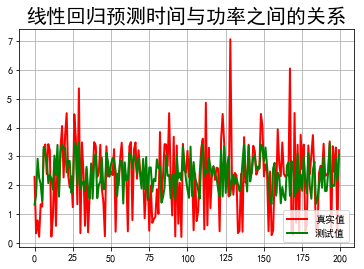

In [76]:
t = np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label='测试值')
plt.legend(loc = 'lower right')
plt.title("线性回归预测时间与功率之间的关系",fontsize = 20)
plt.grid(b=True)
plt.show()